# experiments on MCMC

In [1]:
import numpy as np

# Known data
data = np.array([4.0, 4.2, 4.6, 3.8, 3.9, 4.1])

import scipy.stats as stats

def log_posterior(theta, data):
    # Prior
    prior = stats.norm.logpdf(theta, loc=0, scale=1)
    # Likelihood
    likelihood = np.sum(stats.norm.logpdf(data, loc=theta, scale=np.sqrt(0.5)))
    # Posterior (proportional to prior * likelihood)
    return prior + likelihood

def metropolis_hastings(log_posterior, data, initial_theta, step_size, num_samples):
    # Initialize the chain
    chain = [initial_theta]
    current_log_post = log_posterior(initial_theta, data)

    # Start the Markov chain
    for i in range(num_samples):
        # Propose a new theta
        proposed_theta = chain[-1] + np.random.normal(0, step_size)
        proposed_log_post = log_posterior(proposed_theta, data)

        # Acceptance probability
        accept_prob = min(1, np.exp(proposed_log_post - current_log_post))

        # Decide whether to accept the proposal
        if np.random.rand() < accept_prob:
            chain.append(proposed_theta)
            current_log_post = proposed_log_post
        else:
            chain.append(chain[-1])

    return np.array(chain)

# Initialize theta
initial_theta = 1.0

# Step size
step_size = 0.1

# Number of samples
num_samples = 10000

# Run the Metropolis-Hastings algorithm
chain = metropolis_hastings(log_posterior, data, initial_theta, step_size, num_samples)

# Burn-in period
burn_in = 1000

# Post burn-in samples
post_burn_in_samples = chain[burn_in:]

# Point estimate
point_estimate = np.mean(post_burn_in_samples)

# Credible interval
lower, upper = np.percentile(post_burn_in_samples, [2.5, 97.5])

print(f"Point Estimate: {point_estimate}")
print(f"95% Credible Interval: ({lower}, {upper})")


/home/ph/.virtualenvs/ml4t/lib/python3.8/site-packages/numpy/lib/scimath.py:46: RuntimeWarning: divide by zero encountered in log
  _ln2 = nx.log(2.0)


Point Estimate: 3.7908708933092092
95% Credible Interval: (3.2629953985773397, 4.332354925352358)


In [30]:
stats.norm.logpdf(np.linspace(-5, 5, 100), loc=0, scale=1)

array([-13.41893853, -12.91898955, -12.4292436 , -11.9497007 ,
       -11.48036084, -11.02122401, -10.57229023, -10.13355949,
        -9.70503179,  -9.28670713,  -8.87858551,  -8.48066693,
        -8.09295139,  -7.71543889,  -7.34812943,  -6.99102301,
        -6.64411964,  -6.3074193 ,  -5.980922  ,  -5.66462775,
        -5.35853653,  -5.06264836,  -4.77696322,  -4.50148113,
        -4.23620208,  -3.98112607,  -3.73625309,  -3.50158316,
        -3.27711627,  -3.06285242,  -2.85879161,  -2.66493384,
        -2.48127911,  -2.30782742,  -2.14457877,  -1.99153317,
        -1.8486906 ,  -1.71605107,  -1.59361459,  -1.48138114,
        -1.37935074,  -1.28752337,  -1.20589905,  -1.13447776,
        -1.07325952,  -1.02224432,  -0.98143216,  -0.95082303,
        -0.93041695,  -0.92021391,  -0.92021391,  -0.93041695,
        -0.95082303,  -0.98143216,  -1.02224432,  -1.07325952,
        -1.13447776,  -1.20589905,  -1.28752337,  -1.37935074,
        -1.48138114,  -1.59361459,  -1.71605107,  -1.84

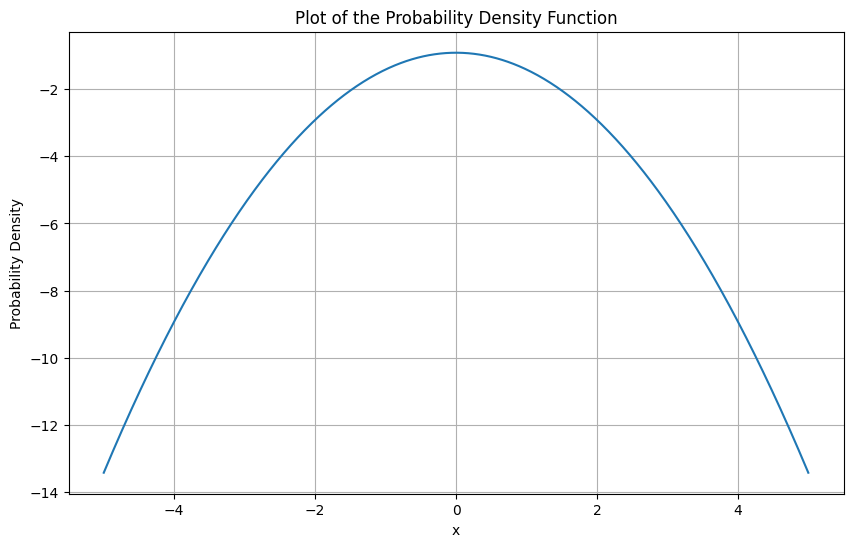

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define your PDF
def F(x):
    return stats.norm.logpdf(x, loc=0, scale=1)

# Generate x values
x = np.linspace(-5, 5, 1000)

# Generate y values (PDF at each x)
y = F(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title("Plot of the Probability Density Function")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()